In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path = 'Raw_Resume.csv'
resume_data = pd.read_csv(file_path, encoding='utf-8')

# Display the first few rows of the dataframe to understand its structure
print(resume_data.head())
print(resume_data.info())

                                              Resume        Type
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
1  G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft
2  PeopleSoft Database Administrator\n\n         ...  PeopleSoft
3  Classification: Internal\n\nClassification: In...  PeopleSoft
4  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Resume  78 non-null     object
 1   Type    78 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
None


# **EDA**

In [ ]:
resume_data['Type'].value_counts()

,count
Type,
React Developer,24
Workday,21
PeopleSoft,19
SQL Developer,14


In [ ]:
print(resume_data['Resume'])

0     Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1     G. Ananda Rayudu \n\n\t\t       https://www.li...
2     PeopleSoft Database Administrator\n\n         ...
3     Classification: Internal\n\nClassification: In...
4     Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...
                            ...                        
73    Workday Integration Consultant\n\n\n\nName    ...
74    Srikanth (WORKDAY hCM Consultant)\t           ...
75    WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
76    Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
77    Vinay kumar .v\nWorkday Functional Consultant\...
Name: Resume, Length: 78, dtype: object


### **REMOVING DOB**

In [ ]:
import re # import the regular expression module
def remove_dob(text):
  """
  Removes date of birth patterns from a given text.
  """
  # Define a regular expression pattern to match common date of birth formats
  pattern = r"(\d{1,2}/\d{1,2}/\d{4})|(\d{1,2}-\d{1,2}-\d{4})|(\d{4}-\d{1,2}-\d{1,2})"
  return re.sub(pattern, "", text)

# Apply the function to the 'Resume' column
resume_data['Resume'] = resume_data['Resume'].apply(remove_dob)


### **TEXT CLEANING**

In [ ]:
import re

def clean_resume(text):
    #Lower case
    text = text.lower()
    # Remove extra spaces and newlines
    text = re.sub(r'\s+', ' ', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# Apply the cleaning function to the 'Resume' column
resume_data['Resume'] = resume_data['Resume'].apply(clean_resume)

# Display the first few rows of the cleaned data
print(resume_data.head())

                                              Resume        Type
0  anubhav kumar singh core competencies scriptin...  PeopleSoft
1  g ananda rayudu httpswwwlinkedincominanandguda...  PeopleSoft
2  peoplesoft database administrator gangareddy p...  PeopleSoft
3  classification internal classification interna...  PeopleSoft
4  priyanka ramadoss 6146 mountpleasant coonoor t...  PeopleSoft


* The re module is Python's built-in library for working with regular expressions. It allows you to search, match, and manipulate strings based on patterns.

* Remove extra spaces and newlines: The function first uses re.sub(r'\s+', ' ', text) to replace all sequences of whitespace characters (including spaces, tabs, and newlines) with a single space.
* Remove special characters: The second re.sub call, re.sub(r'[^\w\s]', '', text), removes any character that is not a word character (alphanumeric) or whitespace. This effectively strips out punctuation and other special characters.
* Trim the text: Finally, text.strip() removes any leading or trailing whitespace from the cleaned text.

In [ ]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
resume_data["Resume"] = resume_data["Resume"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for  word in x.split()]))

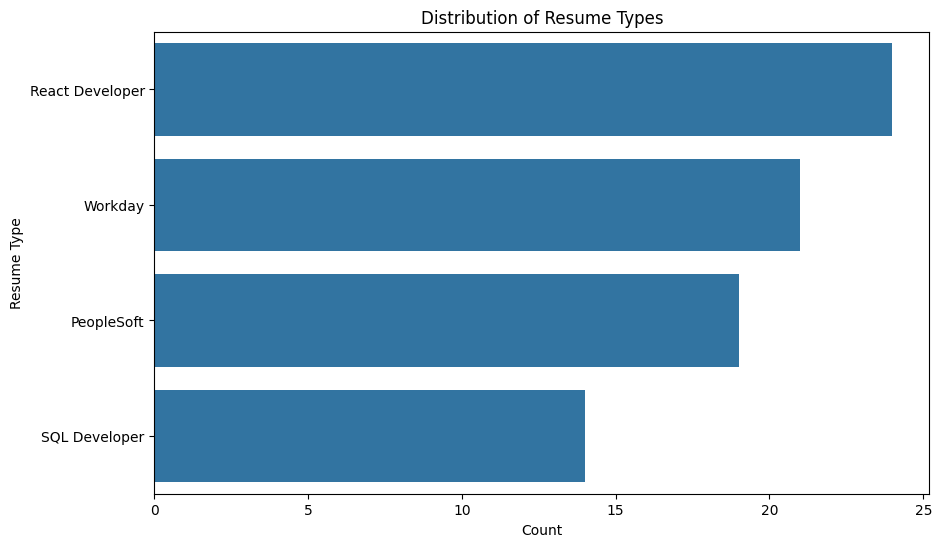

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of resume types
plt.figure(figsize=(10, 6))
sns.countplot(y='Type', data=resume_data, order=resume_data['Type'].value_counts().index)
plt.title('Distribution of Resume Types')
plt.xlabel('Count')
plt.ylabel('Resume Type')
plt.show()

In [ ]:
resume_lengths = resume_data['Resume'].apply(len)
average_length = resume_lengths.mean()
print('Average Length of Resumes:', average_length)

Average Length of Resumes: 4854.833333333333


### **STOPWORDS REMOVAL**

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_words)

# Apply the stopword removal function to the 'Cleaned_Resume' column
resume_data['Resume'] = resume_data['Resume'].apply(remove_stopwords)

**EXPERIENCE AND USING ARE DISTURBING THE MOST FREQUENT WORD COUNT. THEY HAVE NO USE SO LET'S REMOVE THEM**

In [ ]:
def remove_experience_using(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in ["experience", "using"]]
    return ' '.join(filtered_words)

# Apply the function to the 'Filtered_Resume' column
resume_data['Resume'] = resume_data['Resume'].apply(remove_experience_using)

### **MOST FREQUENT WORDS**

In [ ]:
from collections import Counter
# Find the most frequent words in each type of resume
resume_types = resume_data['Type'].unique()

# Dictionary to store the most common words for each resume type
most_common_words_by_type = {}

for resume_type in resume_types:
    # Filter resumes by type
    type_resumes = resume_data[resume_data['Type'] == resume_type]['Resume']
    # Join all resumes of this type into a single string
    all_words = ' '.join(type_resumes).split()
    # Count the frequency of each word
    word_counts = Counter(all_words)
    # Get the 10 most common words
    most_common_words = word_counts.most_common(10)
    # Store the result
    most_common_words_by_type[resume_type] = most_common_words

# Display the most common words for each resume type
for resume_type, words in most_common_words_by_type.items():
    print('Resume Type:', resume_type)
    for word, count in words:
        print(word, ':', count)
    print('\
')

Resume Type: PeopleSoft
peoplesoft : 412
server : 387
application : 376
database : 204
process : 150
environment : 140
tool : 135
people : 132
project : 128
domain : 121

Resume Type: React Developer
react : 116
j : 101
project : 94
web : 74
application : 72
developer : 71
technology : 69
e : 67
javascript : 64
knowledge : 61

Resume Type: SQL Developer
sql : 188
data : 122
server : 106
report : 79
table : 75
database : 72
query : 62
function : 61
project : 56
procedure : 44

Resume Type: Workday
workday : 428
integration : 291
report : 278
business : 186
eib : 137
process : 125
core : 113
hcm : 112
worked : 110
connector : 109



**Experience word is present in each most frequent word list because it is a heading.It is not giving us any useful insight.**

***Technical Skills: The resumes showcase a strong technical skillset, including proficiency in tools and technologies such as:***

* **PeopleSoft-specific tools:** Application Designer, Data Mover, Integration Broker, Change Assistant, PeopleSoft Update Manager (PUM), SQR, PS Query, BI Publisher
* **Databases:** Oracle, SQL Server, DB2
* **Operating Systems:** Windows, Unix, Linux, HPUX
* **Scripting and Programming:** Shell Scripting, PeopleCode, SQL


**PEOPLESOFT**

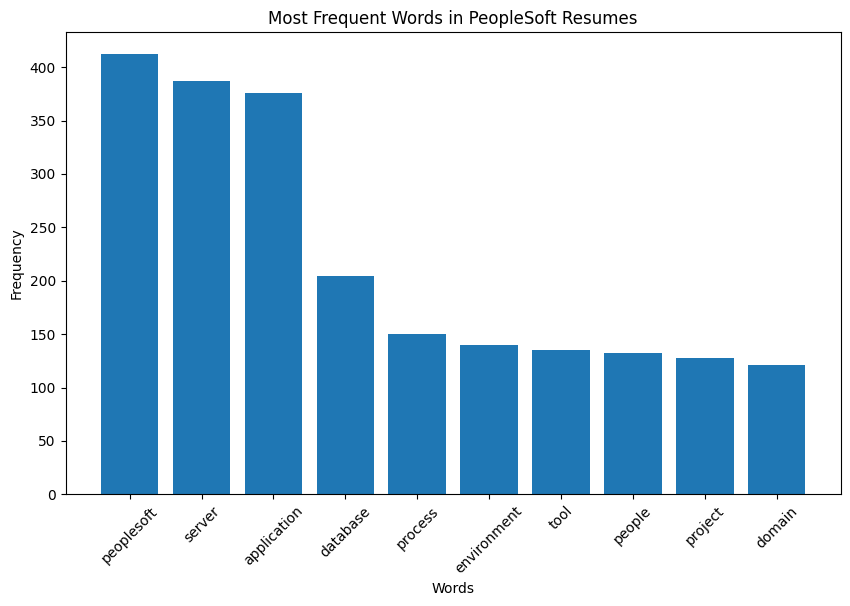

In [ ]:
# Get the most common words for PeopleSoft resumes
peoplesoft_words = most_common_words_by_type['PeopleSoft']

# Extract words and counts
words = [word for word, count in peoplesoft_words]
counts = [count for word, count in peoplesoft_words]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in PeopleSoft Resumes')
plt.xticks(rotation=45)
plt.show()


**SQL DEVELOPER**

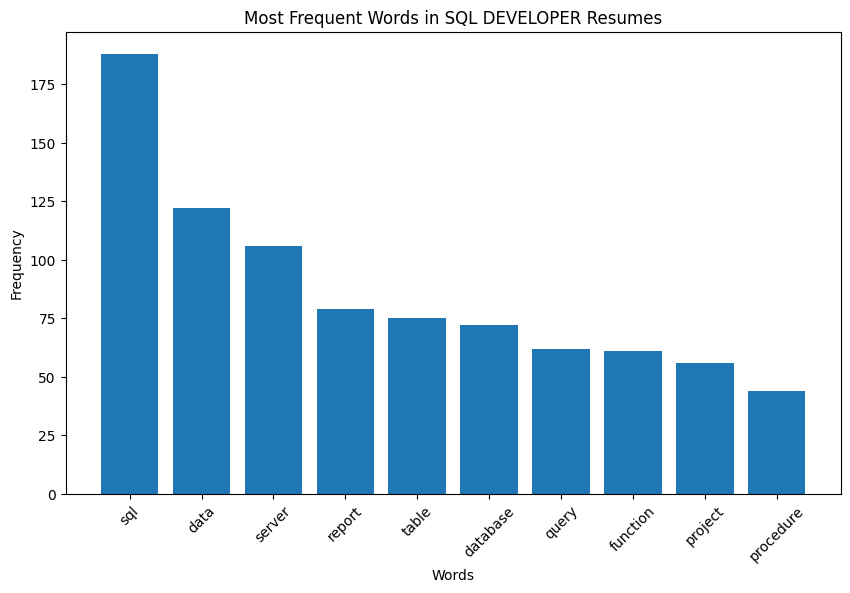

In [ ]:
# Get the most common words for PeopleSoft resumes
sql_developer_words = most_common_words_by_type['SQL Developer']

# Extract words and counts
words = [word for word, count in sql_developer_words]
counts = [count for word, count in sql_developer_words]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in SQL DEVELOPER Resumes')
plt.xticks(rotation=45)
plt.show()


**REACT JS DEVELOPER**

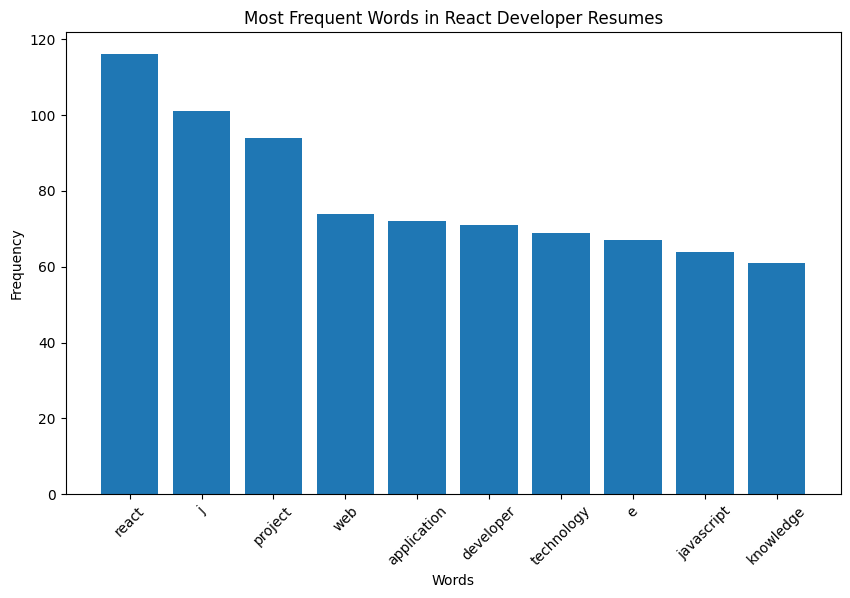

In [ ]:
# Get the most common words for PeopleSoft resumes
react_developer_words = most_common_words_by_type['React Developer']

# Extract words and counts
words = [word for word, count in react_developer_words]
counts = [count for word, count in react_developer_words]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in React Developer Resumes')
plt.xticks(rotation=45)
plt.show()


**WORKDAY**

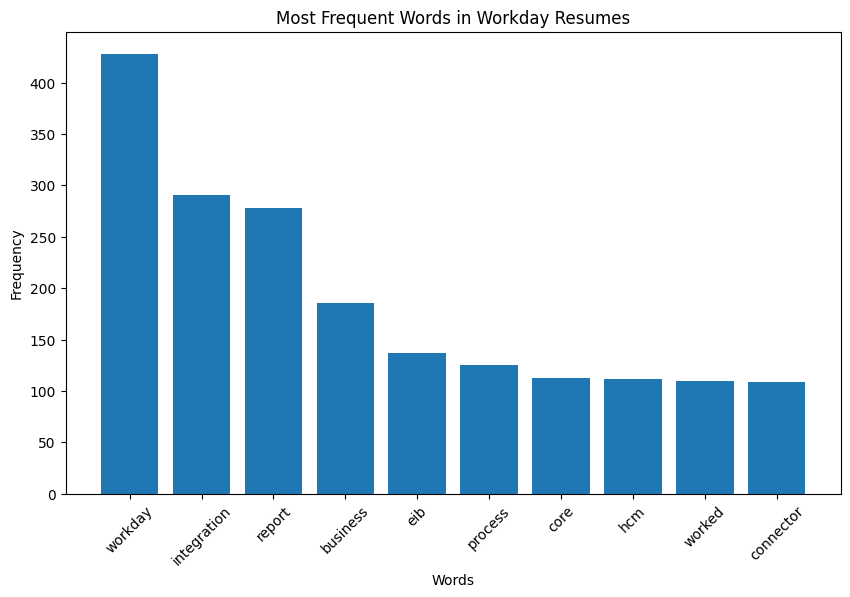

In [ ]:
# Get the most common words for PeopleSoft resumes
Workday_developer_words = most_common_words_by_type['Workday']

# Extract words and counts
words = [word for word, count in Workday_developer_words]
counts = [count for word, count in Workday_developer_words]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in Workday Resumes')
plt.xticks(rotation=45)
plt.show()


### **TOKENIZATION**

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
import nltk

nltk.download('punkt') # Download the 'punkt' resource

nltk_tokens = nltk.word_tokenize('Resume')
print(list(nltk.bigrams(nltk_tokens)))

[]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **EXPERIENCE OF EACH RESUME TYPE**

In [ ]:
React_resume = resume_data[resume_data['Type'] == 'React Developer']
SQL_resume = resume_data[resume_data['Type'] == 'SQL Developer']
Workday_resume = resume_data[resume_data['Type'] == 'Workday']
Peoplesoft_resume = resume_data[resume_data['Type'] == 'PeopleSoft']

### **EXPERIENCE OF POEOPLESOFT**

In [ ]:
#PEOPLESOFT
total_exp_People = []
single_exp = []
for j in range(len(Peoplesoft_resume.Resume)):
    nltk_tokens = nltk.word_tokenize(Peoplesoft_resume.Resume[j])
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_People.append(single_exp)

#Iterate through the list and replace '+' with ''
for idx,l in enumerate(total_exp_People):
    for idy,val in enumerate(l):
        total_exp_People[idx][idy] = val.replace("+", "")

total_exp_People

[[],
 ['7'],
 ['4'],
 ['6'],
 ['411', 'boarduniversity'],
 ['68'],
 ['10', 'andhrapradesh'],
 ['42', '42'],
 [],
 ['64', '44', '44'],
 ['75', '75'],
 ['04'],
 ['41', 'cgpa', '2', '2', 'university'],
 ['102'],
 ['46'],
 ['46'],
 ['36'],
 ['32'],
 ['36']]

**The exp is not 411 its 4.11, lets convert them back to decimal form.**

In [ ]:
# Iterate through the list and replace '+' with ''
for idx, l in enumerate(total_exp_People):
    for idy, val in enumerate(l):
        # Check if the value is a number and contains a '+'
        if val.isdigit() and '+' in val:
            # Replace '+' with ''
            total_exp_People[idx][idy] = val.replace("+", "")
        # Check if the value is a number and does not contain a decimal
        if val.isdigit() and '.' not in val:
            # Add a decimal after the first integer
            total_exp_People[idx][idy] = val[:1] + '.' + val[1:]


**now convert them back to float**

In [ ]:
# Convert the experience values to float and handle non-convertible values
def convert_to_float(exp_list):
  """
  Converts a list of experience values to float and drops non-convertible values.
  """
  float_exp = []
  for exp in exp_list:
    try:
      float_exp.append(float(exp))
    except ValueError:
      pass  # Ignore non-convertible values
  return float_exp

# Apply the function to the experience list
total_exp_People = [convert_to_float(exp_list) for exp_list in total_exp_People]
total_exp_People


[[],
 [7.0],
 [4.0],
 [6.0],
 [4.11],
 [6.8],
 [1.0],
 [4.2, 4.2],
 [],
 [6.4, 4.4, 4.4],
 [7.5, 7.5],
 [0.4],
 [4.1, 2.0, 2.0],
 [1.02],
 [4.6],
 [4.6],
 [3.6],
 [3.2],
 [3.6]]

In [ ]:
import numpy as np

# Flatten the list of lists
flat_list = [item for sublist in total_exp_People for item in sublist]

# Convert the strings to numbers
numeric_list = [float(x) for x in flat_list] # Changed int to float

# Calculate the average
if numeric_list:
  average_years = np.mean(numeric_list)
  print("Average years of experience:", average_years)
else:
  print("No numeric values found in the list.")

Average years of experience: 4.2013043478260865


### **EXPERIENCE OF REACT**

In [ ]:
#REACT
total_exp_react = []
single_exp = []
for j in range(len(React_resume.index)): # Use React_resume.index to iterate over the actual index values
    nltk_tokens = nltk.word_tokenize(React_resume.Resume[React_resume.index[j]])
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_react.append(single_exp)

#Iterate through the list and replace '+' with ''
for idx,l in enumerate(total_exp_react):
    for idy,val in enumerate(l):
        total_exp_react[idx][idy] = val.replace("+", "")

total_exp_react

[['cgpa', 'project'],
 [],
 ['university', '2', '2'],
 ['visakhapatnam'],
 ['3'],
 ['1'],
 ['3'],
 ['2'],
 ['3'],
 ['28', '28', 'percentage'],
 ['2'],
 ['32', '1', '32'],
 ['32', '1', '32'],
 ['9', '35'],
 ['31'],
 ['3'],
 [],
 ['2'],
 ['2'],
 [],
 ['1', '1', 'boarduniversity'],
 ['1'],
 ['2'],
 ['32']]

In [ ]:
# Iterate through the list and replace '+' with ''
for idx, l in enumerate(total_exp_react):
    for idy, val in enumerate(l):
        # Check if the value is a number and contains a '+'
        if val.isdigit() and '+' in val:
            # Replace '+' with ''
            total_exp_react[idx][idy] = val.replace("+", "")
        # Check if the value is a number and does not contain a decimal
        if val.isdigit() and '.' not in val:
            # Add a decimal after the first integer
            total_exp_react[idx][idy] = val[:1] + '.' + val[1:]

In [ ]:
# Convert the experience values to float and handle non-convertible values
def convert_to_float(exp_list):
  """
  Converts a list of experience values to float and drops non-convertible values.
  """
  float_exp = []
  for exp in exp_list:
    try:
      float_exp.append(float(exp))
    except ValueError:
      pass  # Ignore non-convertible values
  return float_exp

# Apply the function to the experience list
total_exp_react = [convert_to_float(exp_list) for exp_list in total_exp_react]
total_exp_react

[[],
 [],
 [2.0, 2.0],
 [],
 [3.0],
 [1.0],
 [3.0],
 [2.0],
 [3.0],
 [2.8, 2.8],
 [2.0],
 [3.2, 1.0, 3.2],
 [3.2, 1.0, 3.2],
 [9.0, 3.5],
 [3.1],
 [3.0],
 [],
 [2.0],
 [2.0],
 [],
 [1.0, 1.0],
 [1.0],
 [2.0],
 [3.2]]

In [ ]:
import numpy as np
# Flatten the list of lists
flat_list = [item for sublist in total_exp_react for item in sublist]

# Convert the strings to numbers
numeric_list = [float(x) for x in flat_list] # Changed int to float

# Calculate the average
if numeric_list:
  average_years = np.mean(numeric_list)
  print("Average years of experience:", average_years)
else:
  print("No numeric values found in the list.")


Average years of experience: 2.562962962962963


### **EXPERIENCE OF SQL**

In [ ]:
#SQL
total_exp_SQL = []
single_exp = []
for j in range(len(SQL_resume)): # Use len(SQL_resume) to get the number of rows
    nltk_tokens = nltk.word_tokenize(SQL_resume.Resume.iloc[j]) # Access the Resume value using .iloc[j]
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_SQL.append(single_exp)
total_exp_SQL,len(total_exp_SQL)

([['24'],
  ['4', '3'],
  ['211', 'cgpa'],
  ['28'],
  ['26'],
  ['3'],
  ['26'],
  ['25', '1'],
  ['23'],
  ['210'],
  ['25'],
  ['35', '1', 'feb20201'],
  ['32'],
  []],
 14)

In [ ]:
# Iterate through the list and replace '+' with ''
for idx, l in enumerate(total_exp_SQL):
    for idy, val in enumerate(l):
        # Check if the value is a number and contains a '+'
        if val.isdigit() and '+' in val:
            # Replace '+' with ''
            total_exp_SQL[idx][idy] = val.replace("+", "")
        # Check if the value is a number and does not contain a decimal
        if val.isdigit() and '.' not in val:
            # Add a decimal after the first integer
            total_exp_SQL[idx][idy] = val[:1] + '.' + val[1:]

In [ ]:
# Convert the experience values to float and handle non-convertible values
def convert_to_float(exp_list):
  """
  Converts a list of experience values to float and drops non-convertible values.
  """
  float_exp = []
  for exp in exp_list:
    try:
      float_exp.append(float(exp))
    except ValueError:
      pass  # Ignore non-convertible values
  return float_exp

# Apply the function to the experience list
total_exp_SQL = [convert_to_float(exp_list) for exp_list in total_exp_SQL]
total_exp_SQL

[[2.4],
 [4.0, 3.0],
 [2.11],
 [2.8],
 [2.6],
 [3.0],
 [2.6],
 [2.5, 1.0],
 [2.3],
 [2.1],
 [2.5],
 [3.5, 1.0],
 [3.2],
 []]

In [ ]:
# Flatten the list of lists
flat_list = [item for sublist in total_exp_SQL for item in sublist]

# Convert the strings to numbers
numeric_list = [float(x) for x in flat_list] # Changed int to float

# Calculate the average
if numeric_list:
  average_years = np.mean(numeric_list)
  print("Average years of experience:", average_years)
else:
  print("No numeric values found in the list.")


Average years of experience: 2.538125


### **EXPERIENCE OF WORKDAY**

In [ ]:
#WORKDAY
total_exp_Workday = []
single_exp = []
for j in range(len(Workday_resume)): # Use len(Workday_resume) to get the number of rows in the DataFrame
    nltk_tokens = nltk.word_tokenize(Workday_resume.Resume.iloc[j]) # Access the Resume using .iloc[] for position-based indexing
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_Workday.append(single_exp)
del total_exp_Workday[2][0]
del total_exp_Workday[15][0]
del total_exp_Workday[6][2]
total_exp_Workday,len(total_exp_Workday)

([['51', '36'],
  ['3'],
  [],
  ['52', '38'],
  [],
  ['3', '2'],
  ['57', '310'],
  ['3', 'degreeexams', 'date', 'deptt', 'deptt', 'deptt'],
  ['6', '35'],
  ['5', '3'],
  ['5', '3'],
  ['3'],
  ['33'],
  ['5', '3'],
  ['5', '3'],
  ['4'],
  ['4', '4'],
  ['4', '4', '3'],
  ['6'],
  ['53', '3'],
  ['42']],
 21)

In [ ]:
# Iterate through the list and replace '+' with ''
for idx, l in enumerate(total_exp_Workday):
    for idy, val in enumerate(l):
        # Check if the value is a number and contains a '+'
        if val.isdigit() and '+' in val:
            # Replace '+' with ''
            total_exp_Workday[idx][idy] = val.replace("+", "")
        # Check if the value is a number and does not contain a decimal
        if val.isdigit() and '.' not in val:
            # Add a decimal after the first integer
            total_exp_Workday[idx][idy] = val[:1] + '.' + val[1:]

In [ ]:
# Convert the experience values to float and handle non-convertible values
def convert_to_float(exp_list):
  """
  Converts a list of experience values to float and drops non-convertible values.
  """
  float_exp = []
  for exp in exp_list:
    try:
      float_exp.append(float(exp))
    except ValueError:
      pass  # Ignore non-convertible values
  return float_exp

# Apply the function to the experience list
total_exp_Workday = [convert_to_float(exp_list) for exp_list in total_exp_Workday]
total_exp_Workday

[[5.1, 3.6],
 [3.0],
 [],
 [5.2, 3.8],
 [],
 [3.0, 2.0],
 [5.7, 3.1],
 [3.0],
 [6.0, 3.5],
 [5.0, 3.0],
 [5.0, 3.0],
 [3.0],
 [3.3],
 [5.0, 3.0],
 [5.0, 3.0],
 [4.0],
 [4.0, 4.0],
 [4.0, 4.0, 3.0],
 [6.0],
 [5.3, 3.0],
 [4.2]]

In [ ]:
# Flatten the list of lists
flat_list = [item for sublist in total_exp_Workday for item in sublist]

# Convert the strings to numbers
numeric_list = [float(x) for x in flat_list] # Changed int to float

# Calculate the average
if numeric_list:
  average_years = np.mean(numeric_list)
  print("Average years of experience:", average_years)
else:
  print("No numeric values found in the list.")


Average years of experience: 3.9625


In [ ]:
resume_data.head()

,Resume,Type
0,anubhav kumar singh core competency scripting ...,PeopleSoft
1,g ananda rayudu httpswwwlinkedincominanandguda...,PeopleSoft
2,peoplesoft database administrator gangareddy p...,PeopleSoft
3,classification internal classification interna...,PeopleSoft
4,priyanka ramadoss 6146 mountpleasant coonoor n...,PeopleSoft


### **REMOVING ALL THE NAMES**

In [ ]:
# Open and read the file
with open('/content/names.txt', 'r') as file:
    names_df1 = file.read()

In [ ]:
# Open and read the file
with open('/content/last_names.txt', 'r') as file:
    names_df2 = file.read()

In [ ]:
# Create DataFrames from the lists
names_df1 = pd.DataFrame(names_df1.splitlines(), columns=['First Name']) # Create a DataFrame with a 'First Name' column
names_df2 = pd.DataFrame(names_df2.splitlines(), columns=['Last Name']) # Create a DataFrame with a 'Last Name' column

In [ ]:
names_df = pd.concat([names_df1, names_df2], ignore_index=True)

In [ ]:
# Open and read the file, split into lines based on newline character
with open('/content/names.txt', 'r') as file:
    names_list = file.read().splitlines()

# Convert the list of names into a set for faster lookups (lowercase for case-insensitivity)
indian_names = set(name.strip().lower() for name in names_list)

In [ ]:
# Log the resumes that lose all content
missing_resumes = []

# Function to safely remove names
def safe_remove_names_from_resume(resume_text, names_set, max_words=3, threshold=0.5):
    original_word_count = len(resume_text.split())

    # Limit name removal to the first `max_words`
    cleaned_text = remove_names_from_resume_limited(resume_text, names_set, max_words)

    # If too much content is removed, log the resume and return the original text
    cleaned_word_count = len(cleaned_text.split())

    if cleaned_word_count < original_word_count * threshold:
        missing_resumes.append(resume_text)  # Log missing resume
        return resume_text  # Return the original text to avoid losing data

    return cleaned_text

In [ ]:
# Same function as before to remove names from the first few words
def remove_names_from_resume_limited(resume_text, names_set, max_words=3):
    # Split the resume into words
    words = resume_text.split()
    result_words = []

    # Process only the first few words (e.g., first 3 words)
    for i, word in enumerate(words):
        if i >= max_words:
            result_words.extend(words[i:])  # Include remaining words
            break
        # Add word only if it's not in the names set
        if word.lower() not in names_set:
            result_words.append(word)

    return " ".join(result_words)

In [ ]:
resumes = resume_data['Resume']

# Process each resume and remove names
cleaned_resumes = []
for resume in resumes:
    cleaned_resume = safe_remove_names_from_resume(resume, indian_names)
    cleaned_resumes.append(cleaned_resume)

In [ ]:
# Log the missing entries
print(f"Total missing entries: {len(missing_resumes)}")
if missing_resumes:
    print(f"Missing Resumes: {missing_resumes}")

Total missing entries: 0


In [ ]:
resume_data['Cleaned_Resume'] = cleaned_resumes

In [ ]:
resume_data.head(5)

,Resume,Type,Cleaned_Resume
0,anubhav kumar singh core competency scripting ...,PeopleSoft,singh core competency scripting shell scriptin...
1,g ananda rayudu httpswwwlinkedincominanandguda...,PeopleSoft,g rayudu httpswwwlinkedincominanandgudapati g ...
2,peoplesoft database administrator gangareddy p...,PeopleSoft,peoplesoft database administrator gangareddy p...
3,classification internal classification interna...,PeopleSoft,classification internal classification interna...
4,priyanka ramadoss 6146 mountpleasant coonoor n...,PeopleSoft,ramadoss 6146 mountpleasant coonoor nilgiris 6...


In [ ]:
resume_data = resume_data.drop('Resume', axis=1)

### **REMOVING UNNECESSARY WORDS**

In [ ]:
def remove_experience_using(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in ["summary", "professional", "objective", 'singh', 'having',
                                    'career', 'education', 'jan', 'feb', 'march', 'aug', 'oct', 'nov']]
    return ' '.join(filtered_words)

# Apply the function to the 'Filtered_Resume' column
resume_data['Cleaned_Resume'] = resume_data['Cleaned_Resume'].apply(remove_experience_using)

### **REMOVING PHONE NUMBERS**

In [ ]:
import re

def remove_phone_numbers(text):
    # Regular expression pattern to match 10-digit phone numbers
    phone_pattern = r'\b\d{10}\b'

    # Check if text is a string
    if isinstance(text, str):
        # Substitute phone numbers with an empty string
        cleaned_text = re.sub(phone_pattern, '', text)
        return cleaned_text
    else:
        return text

# Apply the function to each element in the 'Cleaned_Resume' column
resume_data['Cleaned_Resume'] = resume_data['Cleaned_Resume'].apply(remove_phone_numbers)

### **REMOVING LOCATIONS**

* **General Resume Classification:** If the main goal of your project is to classify resumes based on skills, education, job titles, or experience, location (city and state) might not provide significant value. Features like job titles, experience, and skills would play a much more important role in determining classifications.

* **Bias Risk:** Including geographic data might introduce unintended bias, where candidates from certain regions may be unfairly classified or prioritized. This could affect the fairness and generalization of your model.


**We are focusing solely on skills, job roles, or qualifications, location data may not be crucial and could be removed to avoid potential bias.**

In [ ]:
# List of Indian states
indian_states = [
    'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
    'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka',
    'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
    'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
    'West Bengal', 'Andaman and Nicobar', 'Chandigarh', 'Dadra and Nagar Haveli',
    'Daman and Diu', 'Lakshadweep', 'Delhi', 'Puducherry'
]

# List of major Indian cities
indian_cities = [
    'Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad', 'Chennai',
    'Kolkata', 'Surat', 'Pune', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur',
    'Indore', 'Thane', 'Bhopal', 'Visakhapatnam', 'Pimpri-Chinchwad',
    'Patna', 'Vadodara', 'Ghaziabad']


In [ ]:
import re

def remove_states_and_cities(text, states, cities):
    # Combine states and cities into one list
    all_locations = states + cities

    # Create a regex pattern to match any state or city name, case insensitive
    pattern = r'\b(?:' + '|'.join(re.escape(location) for location in all_locations) + r')\b'

    # Use re.sub to replace all occurrences of state and city names with an empty string
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Return cleaned text
    return cleaned_text


In [ ]:
# Apply the removal function to each resume
resume_data['Cleaned_Resume'] = resume_data['Cleaned_Resume'].apply(
    lambda x: remove_states_and_cities(x, indian_states, indian_cities)
)

# Print the cleaned resumes
print(resume_data['Cleaned_Resume'])

0     core competency scripting shell scripting appl...
1     g rayudu httpswwwlinkedincominanandgudapati g ...
2     peoplesoft database administrator gangareddy w...
3     classification internal classification interna...
4     ramadoss 6146 mountpleasant coonoor nilgiris 6...
                            ...                        
73    workday integration consultant sri krishna s s...
74    workday hcm consultant seeking suitable positi...
75    workday hcm fcm kumar s role workday consultan...
76    venkateswarlub workday consultant 53 year 3 ye...
77    v workday functional consultant expertise 42 y...
Name: Cleaned_Resume, Length: 78, dtype: object


### **CLEANED RESUME**

In [ ]:
# Print the cleaned resumes
for i, resume in enumerate(resume_data['Cleaned_Resume']):
    print(f"Cleaned Resume {i+1}: {resume}\n")

Cleaned Resume 1: core competency scripting shell scripting application peoplesoft hcm financials operating linux window webapp server weblogic tuxedo rdbms oracle repository github core competency scripting shell scripting application peoplesoft hcm financials operating linux window webapp server weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignment shall yield twin benefit job satisfaction steadypaced growth 062019 current hcl current role admin offshore skill shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environment support environment installed linux window o involved day day activity project migration database refresh admin change tax update troubleshooting various server like application server web server process scheduler server applying tuxedo weblogic middleware cpu patch various application working shell scripting used integration method exchange file external ins

# **MODEL BUILDING**

**Label encoding 'Type' column.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
resume_data["Type"] = le.fit_transform(resume_data["Type"])
resume_data.head(5)

,Type,Cleaned_Resume
0,0,core competency scripting shell scripting appl...
1,0,g rayudu httpswwwlinkedincominanandgudapati g ...
2,0,peoplesoft database administrator gangareddy w...
3,0,classification internal classification interna...
4,0,ramadoss 6146 mountpleasant coonoor nilgiris 6...


In [ ]:
resume_data['Type'].value_counts()

,count
Type,
1,24
3,21
0,19
2,14


In [ ]:
#resume_data.to_csv('cleaned_resume_data.csv', index=False)

In [ ]:
x = resume_data['Cleaned_Resume']
y = resume_data['Type']

### **TD-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vt = TfidfVectorizer()
x = vt.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred_train = nb.predict(x_train)
y_pred_test = nb.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('TRAINING SCORE', accuracy_score(y_train, y_pred_train))
print('TESTING SCORE', accuracy_score(y_test, y_pred_test))

TRAINING SCORE 1.0
TESTING SCORE 0.9375


### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 15, random_state=42,max_samples=0.4,max_features=0.4,max_depth=5)
RFC.fit(x_train, y_train)
print("Bagging-Training score:",RFC.score(x_train, y_train))
print("Bagging-Test score:",RFC.score(x_test, y_test))

Bagging-Training score: 0.9838709677419355
Bagging-Test score: 1.0


### XG BOOST

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb = XGBClassifier(n_estimators=10, learning_rate=0.1)

# Train the model
xgb.fit(x_train, y_train)

# Predict on the training and testing data
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

# Calculate the accuracy scores
print('XGBoost - TRAINING SCORE', accuracy_score(y_train, y_pred_train_xgb))
print('XGBoost - TESTING SCORE', accuracy_score(y_test, y_pred_test_xgb))


XGBoost - TRAINING SCORE 1.0
XGBoost - TESTING SCORE 1.0


### KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
print('TRAINING SCORE', accuracy_score(y_train, y_pred_train))
print('TESTING SCORE', accuracy_score(y_test, y_pred_test))

TRAINING SCORE 0.9838709677419355
TESTING SCORE 1.0


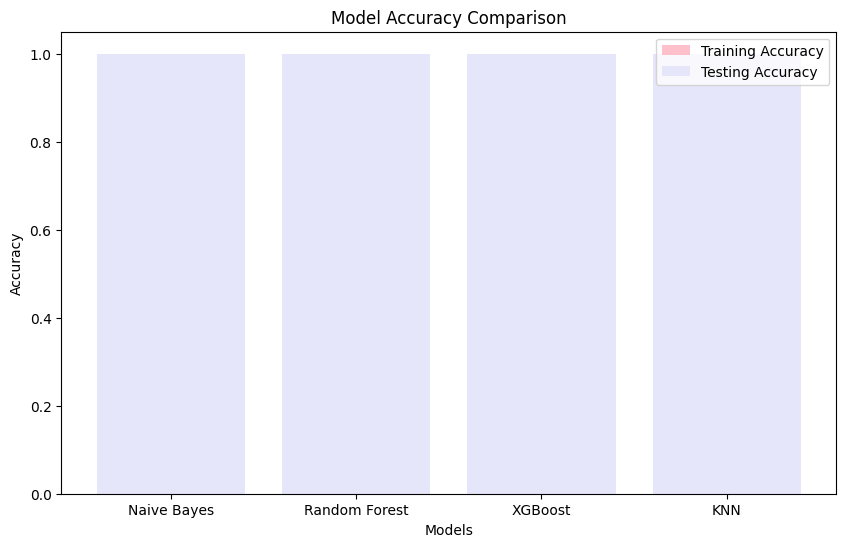

In [ ]:
import matplotlib.pyplot as plt

# Model accuracies
models = ['Naive Bayes', 'Random Forest', 'XGBoost', 'KNN']
train_scores = [accuracy_score(y_train, y_pred_train), RFC.score(x_train, y_train), accuracy_score(y_train, y_pred_train_xgb), accuracy_score(y_train, y_pred_train)]
test_scores = [accuracy_score(y_test, y_pred_test), RFC.score(x_test, y_test), accuracy_score(y_test, y_pred_test_xgb), accuracy_score(y_test, y_pred_test)]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(models, train_scores, color='pink', label='Training Accuracy')
plt.bar(models, test_scores, color='lavender', label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()


### **On using TD-IDF, there was a lot of overfitting. Now we are going to try Count-Vector.**

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
cv = CountVectorizer()

# Fit and transform the text data
x_cv = cv.fit_transform(resume_data['Cleaned_Resume'])

# Split the data into training and testing sets
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(
    x_cv, y, test_size=0.2, random_state=42
)

# Now you can use this transformed data with your chosen model (e.g., Naive Bayes, Random Forest)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_cv, y_train_cv)
y_pred_train = knn.predict(x_train_cv)
y_pred_test = knn.predict(x_test_cv)
print('TRAINING SCORE', accuracy_score(y_train_cv, y_pred_train))
print('TESTING SCORE', accuracy_score(y_test_cv, y_pred_test))

TRAINING SCORE 0.967741935483871
TESTING SCORE 0.875


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 15, random_state=42,max_samples=0.4,max_features=0.4,max_depth=5)
RFC.fit(x_train_cv, y_train_cv)
print("Bagging-Training score:",RFC.score(x_train_cv, y_train_cv))
print("Bagging-Test score:",RFC.score(x_test_cv, y_test_cv))

Bagging-Training score: 0.9838709677419355
Bagging-Test score: 0.9375


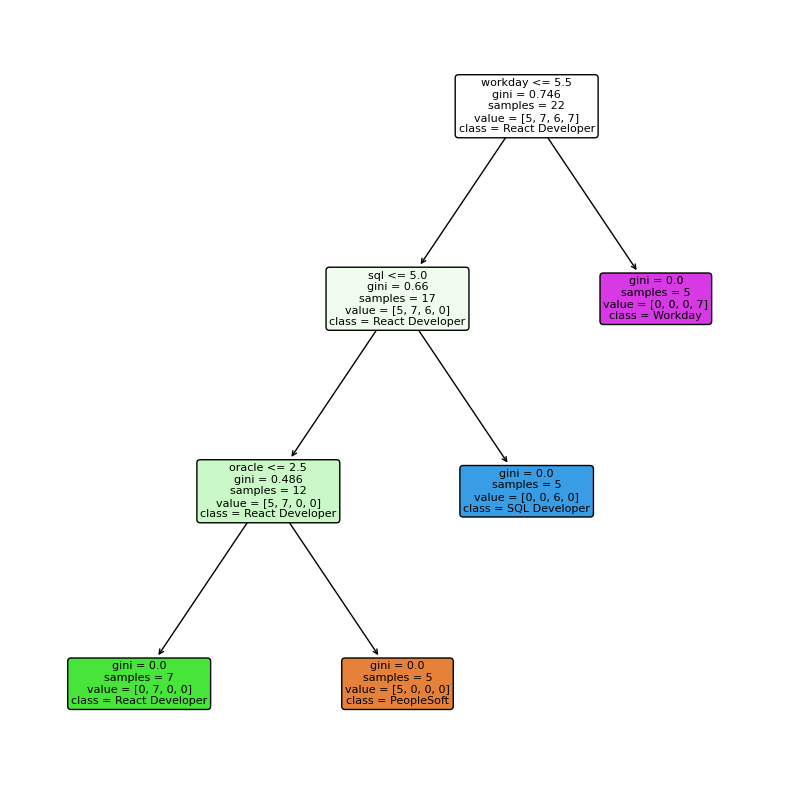

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'RFC' is your trained Random Forest Classifier
# Select the first tree in the forest
tree = RFC.estimators_[0]

# Plot the tree
plt.figure(figsize=(10, 10))
plot_tree(tree,
          feature_names=vt.get_feature_names_out(),  # Use the feature names from your vectorizer
          class_names=le.classes_,  # Use the class names from your label encoder
          filled=True,
          rounded=True,
          fontsize=8)
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_cv, y_train_cv)
y_pred_train = nb.predict(x_train_cv)
y_pred_test = nb.predict(x_test_cv)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('TRAINING SCORE', accuracy_score(y_train_cv, y_pred_train))
print('TESTING SCORE', accuracy_score(y_test_cv, y_pred_test))

TRAINING SCORE 1.0
TESTING SCORE 0.9375


In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb = XGBClassifier(n_estimators=5, learning_rate=0.01)

# Train the model
xgb.fit(x_train_cv, y_train_cv)

# Predict on the training and testing data
y_pred_train_xgb = xgb.predict(x_train_cv)
y_pred_test_xgb = xgb.predict(x_test_cv)

# Calculate the accuracy scores
print('XGBoost - TRAINING SCORE', accuracy_score(y_train_cv, y_pred_train_xgb))
print('XGBoost - TESTING SCORE', accuracy_score(y_test_cv, y_pred_test_xgb))

XGBoost - TRAINING SCORE 0.9838709677419355
XGBoost - TESTING SCORE 1.0


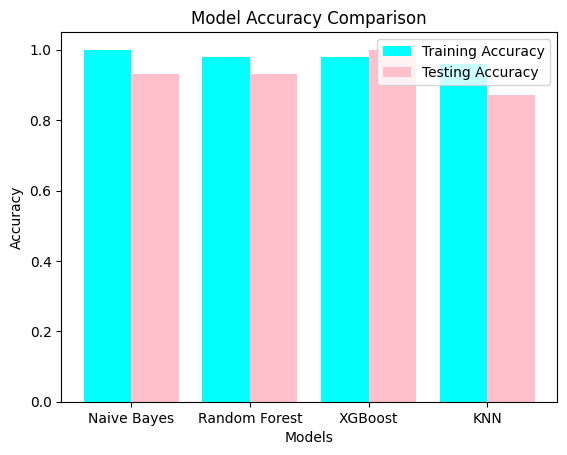

In [ ]:
import matplotlib.pyplot as plt

# Data for the graph
models = ['Naive Bayes', 'Random Forest', 'XGBoost', 'KNN']
training_scores = [1.0, 0.98, 0.98, 0.96]  # Replace with actual training scores
testing_scores = [0.93, 0.93, 1.0, 0.87]  # Replace with actual testing scores

# Create the plot
x = range(len(models))
plt.bar(x, training_scores, width=0.4, label='Training Accuracy', color='cyan')
plt.bar([i + 0.4 for i in x], testing_scores, width=0.4, label='Testing Accuracy', color='pink')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks([i + 0.2 for i in x], models)
plt.legend()

# Display the plot
plt.show()


### **RANDOM FOREST IS PERFORMING GOOD OUT OF ALL**